In [1]:
# import dependencies
import pandas as pd                     #Load libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas import Series
from scipy import stats
import requests, re
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
import os
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract
import sqlite3 as sql

In [2]:
# load data
db = sqlalchemy.create_engine('sqlite:///movies.sqlite')
imdb_df = pd.read_sql('select * from movies', db)
imdb_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,None,None,None,None,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,None,None,None,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",None,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,None,None,None,None,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,None,None,None,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,None,None,None,None,31.0,14.0


In [3]:
imdb_df.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [4]:
# drop columns
imdb_df = imdb_df.drop(columns=['imdb_title_id', 'original_title', 'director', 'writer', 'production_company', 'actors','description', 'avg_vote', 'votes'])
imdb_df.head()

,title,year,date_published,genre,duration,country,language,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,None,None,None,None,1.0,2.0
1,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,$ 2250,None,None,None,7.0,7.0
2,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",None,None,None,None,None,5.0,2.0
3,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,$ 45000,None,None,None,25.0,3.0
4,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,None,None,None,None,31.0,14.0


In [5]:
# replace None values with Nan
imdb_df = imdb_df.fillna(value=np.nan)
imdb_df.head()

,title,year,date_published,genre,duration,country,language,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,NaN,NaN,NaN,NaN,1.0,2.0
1,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,$ 2250,NaN,NaN,NaN,7.0,7.0
2,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,NaN,NaN,NaN,NaN,5.0,2.0
3,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,$ 45000,NaN,NaN,NaN,25.0,3.0
4,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,NaN,NaN,NaN,NaN,31.0,14.0


In [6]:
# fill null duration values with the mean duration
duration = imdb_df[~imdb_df['duration'].isna()]
imdb_df['duration'] = imdb_df['duration'].fillna(duration['duration'].mean()) 

In [7]:
# drop nan values
imdb_df = imdb_df.dropna()
imdb_df.head()

,title,year,date_published,genre,duration,country,language,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
506,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,DEM 6000000,$ 1236166,$ 1349711,98.0,495.0,208.0
1048,Luci della città,1931,1931-04-02,"Comedy, Drama, Romance",87,USA,English,$ 1500000,$ 19181,$ 46008,99.0,295.0,122.0
2454,Tempi moderni,1936,1937-03-12,"Comedy, Drama, Family",87,USA,English,$ 1500000,$ 163577,$ 457688,96.0,307.0,115.0
2795,Il bandito della Casbah,1937,1937-10-22,"Crime, Drama, Romance",94,France,"French, Arabic",$ 60000,$ 155895,$ 155895,98.0,46.0,55.0
2827,Biancaneve e i sette nani,1937,1938-11-30,"Animation, Family, Fantasy",83,USA,English,$ 1499000,$ 184925486,$ 184925486,95.0,260.0,173.0


In [8]:
imdb_df.dtypes

title                    object
year                     object
date_published           object
genre                    object
duration                  int64
country                  object
language                 object
budget                   object
usa_gross_income         object
worlwide_gross_income    object
metascore                object
reviews_from_users       object
reviews_from_critics     object
dtype: object

In [9]:
imdb_df = imdb_df[imdb_df['year'] > 1980]

In [10]:
imdb_df.head()

,title,year,date_published,genre,duration,country,language,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
4334,Kate & Leopold,2001,2002-03-01,"Comedy, Fantasy, Romance",118,USA,"English, French",$ 48000000,$ 47121859,$ 76019048,44.0,341.0,115.0
19630,Scanners,1981,1982-05-01,"Horror, Sci-Fi, Thriller",103,Canada,English,CAD 4100000,$ 14225876,$ 14225876,60.0,196.0,132.0
19691,I banditi del tempo,1981,1983-01-06,"Adventure, Comedy, Fantasy",116,UK,English,$ 5000000,$ 42365581,$ 42368025,79.0,202.0,150.0
19759,Diritto di cronaca,1981,1982-03-05,"Drama, Romance, Thriller",116,USA,"English, Spanish",$ 12000000,$ 40716963,$ 40716963,64.0,115.0,27.0
19769,Un lupo mannaro americano a Londra,1981,1981-12-19,"Comedy, Horror",97,"UK, USA",English,$ 10000000,$ 30565292,$ 30565292,60.0,400.0,248.0


In [11]:
# check null values
imdb_df.isna().sum()

title                    0
year                     0
date_published           0
genre                    0
duration                 0
country                  0
language                 0
budget                   0
usa_gross_income         0
worlwide_gross_income    0
metascore                0
reviews_from_users       0
reviews_from_critics     0
dtype: int64

In [12]:
# keep movies only made in USA
imdb_df = imdb_df.loc[imdb_df['country']=='USA']

In [13]:
imdb_df['budget'] = pd.to_numeric(imdb_df['budget'].replace('[\DEM]','',regex=True))

In [14]:
imdb_df['budget'] = pd.to_numeric(imdb_df['budget'].replace('[\CAD]','',regex=True))

In [15]:
# rename worlwide_gross_income to total_gross
imdb_df.rename(columns={"worlwide_gross_income":"total_gross"}, inplace=True)
imdb_df.head()

,title,year,date_published,genre,duration,country,language,budget,usa_gross_income,total_gross,metascore,reviews_from_users,reviews_from_critics
4334,Kate & Leopold,2001,2002-03-01,"Comedy, Fantasy, Romance",118,USA,"English, French",48000000,$ 47121859,$ 76019048,44.0,341.0,115.0
19759,Diritto di cronaca,1981,1982-03-05,"Drama, Romance, Thriller",116,USA,"English, Spanish",12000000,$ 40716963,$ 40716963,64.0,115.0,27.0
19774,Arturo,1981,1982-02-04,"Comedy, Romance",97,USA,English,7000000,$ 95461682,$ 95461682,69.0,132.0,44.0
19790,Blow Out,1981,1982-04-14,"Crime, Drama, Mystery",108,USA,English,18000000,$ 12000000,$ 12000000,86.0,199.0,123.0
19804,Libertà poco vigilata,1981,1981-05-22,"Comedy, Drama",94,USA,English,11000000,$ 31261269,$ 31261269,55.0,16.0,5.0


In [16]:
imdb_df['total_gross'] = pd.to_numeric(imdb_df['total_gross'].replace('[\$]','',regex=True))

In [17]:
# extract month from date_published
imdb_df['month'] = pd.DatetimeIndex(imdb_df['date_published']).month

In [18]:
imdb_df.head()

,title,year,date_published,genre,duration,country,language,budget,usa_gross_income,total_gross,metascore,reviews_from_users,reviews_from_critics,month
4334,Kate & Leopold,2001,2002-03-01,"Comedy, Fantasy, Romance",118,USA,"English, French",48000000,$ 47121859,76019048,44.0,341.0,115.0,3
19759,Diritto di cronaca,1981,1982-03-05,"Drama, Romance, Thriller",116,USA,"English, Spanish",12000000,$ 40716963,40716963,64.0,115.0,27.0,3
19774,Arturo,1981,1982-02-04,"Comedy, Romance",97,USA,English,7000000,$ 95461682,95461682,69.0,132.0,44.0,2
19790,Blow Out,1981,1982-04-14,"Crime, Drama, Mystery",108,USA,English,18000000,$ 12000000,12000000,86.0,199.0,123.0,4
19804,Libertà poco vigilata,1981,1981-05-22,"Comedy, Drama",94,USA,English,11000000,$ 31261269,31261269,55.0,16.0,5.0,5


In [19]:
# drop date_published column
imdb_df = imdb_df.drop(columns=['date_published'])
imdb_df.head()

,title,year,genre,duration,country,language,budget,usa_gross_income,total_gross,metascore,reviews_from_users,reviews_from_critics,month
4334,Kate & Leopold,2001,"Comedy, Fantasy, Romance",118,USA,"English, French",48000000,$ 47121859,76019048,44.0,341.0,115.0,3
19759,Diritto di cronaca,1981,"Drama, Romance, Thriller",116,USA,"English, Spanish",12000000,$ 40716963,40716963,64.0,115.0,27.0,3
19774,Arturo,1981,"Comedy, Romance",97,USA,English,7000000,$ 95461682,95461682,69.0,132.0,44.0,2
19790,Blow Out,1981,"Crime, Drama, Mystery",108,USA,English,18000000,$ 12000000,12000000,86.0,199.0,123.0,4
19804,Libertà poco vigilata,1981,"Comedy, Drama",94,USA,English,11000000,$ 31261269,31261269,55.0,16.0,5.0,5


In [20]:
# create a net income column
imdb_df['net_income'] = imdb_df['total_gross'] - imdb_df['budget']
imdb_df.head()

,title,year,genre,duration,country,language,budget,usa_gross_income,total_gross,metascore,reviews_from_users,reviews_from_critics,month,net_income
4334,Kate & Leopold,2001,"Comedy, Fantasy, Romance",118,USA,"English, French",48000000,$ 47121859,76019048,44.0,341.0,115.0,3,28019048
19759,Diritto di cronaca,1981,"Drama, Romance, Thriller",116,USA,"English, Spanish",12000000,$ 40716963,40716963,64.0,115.0,27.0,3,28716963
19774,Arturo,1981,"Comedy, Romance",97,USA,English,7000000,$ 95461682,95461682,69.0,132.0,44.0,2,88461682
19790,Blow Out,1981,"Crime, Drama, Mystery",108,USA,English,18000000,$ 12000000,12000000,86.0,199.0,123.0,4,-6000000
19804,Libertà poco vigilata,1981,"Comedy, Drama",94,USA,English,11000000,$ 31261269,31261269,55.0,16.0,5.0,5,20261269


In [21]:
imdb_df = imdb_df.drop(columns=['usa_gross_income'])
imdb_df.head()

,title,year,genre,duration,country,language,budget,total_gross,metascore,reviews_from_users,reviews_from_critics,month,net_income
4334,Kate & Leopold,2001,"Comedy, Fantasy, Romance",118,USA,"English, French",48000000,76019048,44.0,341.0,115.0,3,28019048
19759,Diritto di cronaca,1981,"Drama, Romance, Thriller",116,USA,"English, Spanish",12000000,40716963,64.0,115.0,27.0,3,28716963
19774,Arturo,1981,"Comedy, Romance",97,USA,English,7000000,95461682,69.0,132.0,44.0,2,88461682
19790,Blow Out,1981,"Crime, Drama, Mystery",108,USA,English,18000000,12000000,86.0,199.0,123.0,4,-6000000
19804,Libertà poco vigilata,1981,"Comedy, Drama",94,USA,English,11000000,31261269,55.0,16.0,5.0,5,20261269


In [22]:
# rename reviews from critics
imdb_df.rename(columns={"reviews_from_critics":"critic_reviews"}, inplace=True)

In [23]:
# rename reviews from users
imdb_df.rename(columns={"reviews_from_users":"user_reviews"}, inplace=True)
imdb_df.head()

,title,year,genre,duration,country,language,budget,total_gross,metascore,user_reviews,critic_reviews,month,net_income
4334,Kate & Leopold,2001,"Comedy, Fantasy, Romance",118,USA,"English, French",48000000,76019048,44.0,341.0,115.0,3,28019048
19759,Diritto di cronaca,1981,"Drama, Romance, Thriller",116,USA,"English, Spanish",12000000,40716963,64.0,115.0,27.0,3,28716963
19774,Arturo,1981,"Comedy, Romance",97,USA,English,7000000,95461682,69.0,132.0,44.0,2,88461682
19790,Blow Out,1981,"Crime, Drama, Mystery",108,USA,English,18000000,12000000,86.0,199.0,123.0,4,-6000000
19804,Libertà poco vigilata,1981,"Comedy, Drama",94,USA,English,11000000,31261269,55.0,16.0,5.0,5,20261269


In [24]:
imdb_df = imdb_df[['title', 'year', 'month', 'genre', 'duration', 'country',
       'language', 'budget', 'total_gross', 'net_income', 'critic_reviews', 'user_reviews', 'metascore']]
imdb_df.head()

,title,year,month,genre,duration,country,language,budget,total_gross,net_income,critic_reviews,user_reviews,metascore
4334,Kate & Leopold,2001,3,"Comedy, Fantasy, Romance",118,USA,"English, French",48000000,76019048,28019048,115.0,341.0,44.0
19759,Diritto di cronaca,1981,3,"Drama, Romance, Thriller",116,USA,"English, Spanish",12000000,40716963,28716963,27.0,115.0,64.0
19774,Arturo,1981,2,"Comedy, Romance",97,USA,English,7000000,95461682,88461682,44.0,132.0,69.0
19790,Blow Out,1981,4,"Crime, Drama, Mystery",108,USA,English,18000000,12000000,-6000000,123.0,199.0,86.0
19804,Libertà poco vigilata,1981,5,"Comedy, Drama",94,USA,English,11000000,31261269,20261269,5.0,16.0,55.0


In [25]:
# check data types
imdb_df.dtypes

title             object
year              object
month              int64
genre             object
duration           int64
country           object
language          object
budget             int64
total_gross        int64
net_income         int64
critic_reviews    object
user_reviews      object
metascore         object
dtype: object

In [26]:
# convert year, critic reviews, user reviews, and metascore to numeric
imdb_df['year'] = imdb_df['year'].astype(int)
imdb_df.dtypes

title             object
year               int32
month              int64
genre             object
duration           int64
country           object
language          object
budget             int64
total_gross        int64
net_income         int64
critic_reviews    object
user_reviews      object
metascore         object
dtype: object

In [27]:
# convert metascore data types to float
imdb_df['metascore']=imdb_df['metascore'].astype(float)
imdb_df.dtypes

title              object
year                int32
month               int64
genre              object
duration            int64
country            object
language           object
budget              int64
total_gross         int64
net_income          int64
critic_reviews     object
user_reviews       object
metascore         float64
dtype: object

In [28]:
# convert critic and user reviews to float
imdb_df['critic_reviews']=imdb_df['critic_reviews'].astype(float)
imdb_df['user_reviews']=imdb_df['user_reviews'].astype(float)
imdb_df.dtypes

title              object
year                int32
month               int64
genre              object
duration            int64
country            object
language           object
budget              int64
total_gross         int64
net_income          int64
critic_reviews    float64
user_reviews      float64
metascore         float64
dtype: object

In [29]:
imdb_df.head(10)

,title,year,month,genre,duration,country,language,budget,total_gross,net_income,critic_reviews,user_reviews,metascore
4334,Kate & Leopold,2001,3,"Comedy, Fantasy, Romance",118,USA,"English, French",48000000,76019048,28019048,115.0,341.0,44.0
19759,Diritto di cronaca,1981,3,"Drama, Romance, Thriller",116,USA,"English, Spanish",12000000,40716963,28716963,27.0,115.0,64.0
19774,Arturo,1981,2,"Comedy, Romance",97,USA,English,7000000,95461682,88461682,44.0,132.0,69.0
19790,Blow Out,1981,4,"Crime, Drama, Mystery",108,USA,English,18000000,12000000,-6000000,123.0,199.0,86.0
19804,Libertà poco vigilata,1981,5,"Comedy, Drama",94,USA,English,11000000,31261269,20261269,5.0,16.0,55.0
19837,Alla maniera di Cutter,1981,2,"Crime, Drama, Mystery",109,USA,English,3000000,1752634,-1247366,43.0,60.0,70.0
19847,Benedizione mortale,1981,8,"Horror, Thriller",100,USA,English,2500000,8279042,5779042,114.0,73.0,56.0
19880,Entity,1982,2,"Drama, Horror",125,USA,English,9000000,13277558,4277558,122.0,145.0,35.0
19883,1997: fuga da New York,1981,10,"Action, Adventure, Sci-Fi",99,USA,English,6000000,25244626,19244626,250.0,343.0,76.0
19892,Uno scomodo testimone,1981,9,"Crime, Drama, Mystery",103,USA,English,8500000,6400000,-2100000,31.0,38.0,61.0


In [30]:
# create a new column 'meta_hit'
def f(row):
    if float(row['metascore']) >= 75.0:
        val = '1'
    else:
        val = '0'
    return val

imdb_df['meta_hit'] = imdb_df.apply(f, axis=1)

imdb_df

,title,year,month,genre,duration,country,language,budget,total_gross,net_income,critic_reviews,user_reviews,metascore,meta_hit
4334,Kate & Leopold,2001,3,"Comedy, Fantasy, Romance",118,USA,"English, French",48000000,76019048,28019048,115.0,341.0,44.0,0
19759,Diritto di cronaca,1981,3,"Drama, Romance, Thriller",116,USA,"English, Spanish",12000000,40716963,28716963,27.0,115.0,64.0,0
19774,Arturo,1981,2,"Comedy, Romance",97,USA,English,7000000,95461682,88461682,44.0,132.0,69.0,0
19790,Blow Out,1981,4,"Crime, Drama, Mystery",108,USA,English,18000000,12000000,-6000000,123.0,199.0,86.0,1
19804,Libertà poco vigilata,1981,5,"Comedy, Drama",94,USA,English,11000000,31261269,20261269,5.0,16.0,55.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84912,Cena con delitto - Knives Out,2019,12,"Comedy, Crime, Drama",130,USA,"English, Spanish, Hindi",40000000,309232797,269232797,448.0,2334.0,82.0,1
85028,Unplanned,2019,3,"Biography, Drama",109,USA,English,6000000,21171090,15171090,34.0,629.0,10.0,0
85176,Non si scherza col fuoco,2019,2,"Comedy, Family",96,USA,"English, Spanish",29900000,68631669,38731669,62.0,219.0,24.0,0
85266,Impractical Jokers: The Movie,2020,2,Comedy,92,USA,English,3000000,10691091,7691091,17.0,152.0,39.0,0


In [31]:
# convert meta_hit to numeric
imdb_df['meta_hit'] = pd.to_numeric(imdb_df['meta_hit'])
imdb_df.dtypes

title              object
year                int32
month               int64
genre              object
duration            int64
country            object
language           object
budget              int64
total_gross         int64
net_income          int64
critic_reviews    float64
user_reviews      float64
metascore         float64
meta_hit            int64
dtype: object

In [ ]:
# # save new cleaned data
# imdb_df.to_csv('resources/cleaned_movies_v2.csv')

<AxesSubplot:>

<Figure size 1800x800 with 0 Axes>

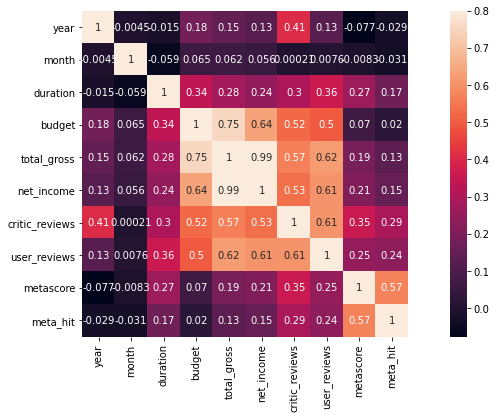

In [32]:
# plot a heat map
plt.figure(figsize=(18,8),dpi=100,)
plt.subplots(figsize=(15,6))
sns.heatmap(data=imdb_df.corr(),square=True,vmax=0.8,annot=True)

In [33]:
imdb_df.columns

Index(['title', 'year', 'month', 'genre', 'duration', 'country', 'language',
       'budget', 'total_gross', 'net_income', 'critic_reviews', 'user_reviews',
       'metascore', 'meta_hit'],
      dtype='object')

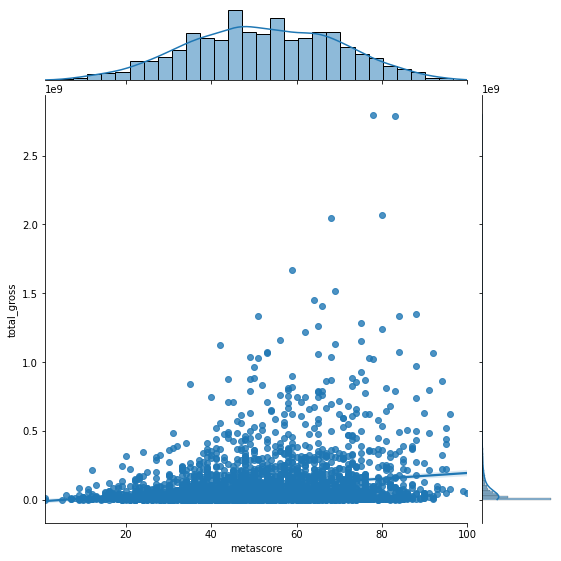

In [34]:
# create a sns plot for metascore and gross
sns.jointplot(x=(imdb_df['metascore']),y=(imdb_df['total_gross']),kind='reg',height=7.9)

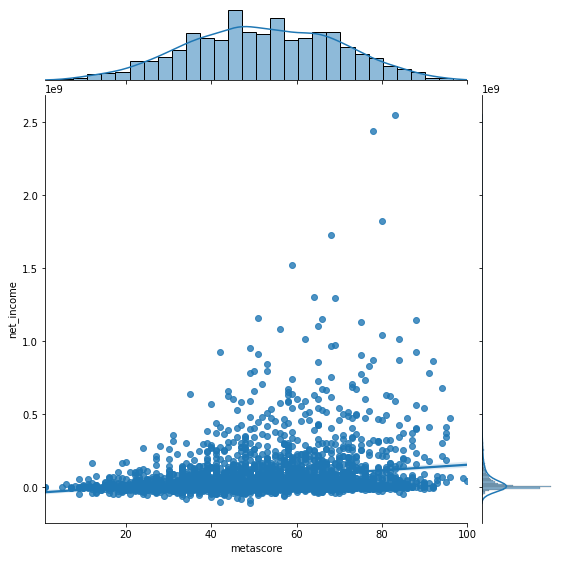

In [35]:
# create a sns plot for metascore and net_income
sns.jointplot(x=(imdb_df['metascore']),y=(imdb_df['net_income']),kind='reg',height=7.9)

In [36]:
# get metscore counts
meta_counts = imdb_df.metascore.value_counts()
meta_counts

47.0     87
45.0     86
52.0     77
49.0     76
56.0     75
         ..
8.0       1
5.0       1
100.0     1
6.0       1
99.0      1
Name: metascore, Length: 95, dtype: int64

In [37]:
pd.cut(imdb_df['metascore'].astype(float),bins=4)

4334      (25.75, 50.5]
19759     (50.5, 75.25]
19774     (50.5, 75.25]
19790    (75.25, 100.0]
19804     (50.5, 75.25]
              ...      
84912    (75.25, 100.0]
85028    (0.901, 25.75]
85176    (0.901, 25.75]
85266     (25.75, 50.5]
85740     (25.75, 50.5]
Name: metascore, Length: 3331, dtype: category
Categories (4, interval[float64]): [(0.901, 25.75] < (25.75, 50.5] < (50.5, 75.25] < (75.25, 100.0]]

<AxesSubplot:ylabel='Density'>

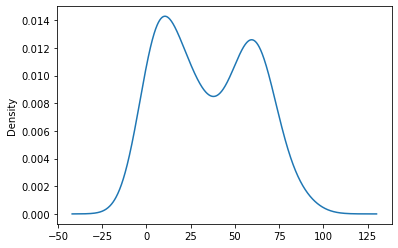

In [38]:
# visualize the value counts of metascore
meta_counts.plot.density()

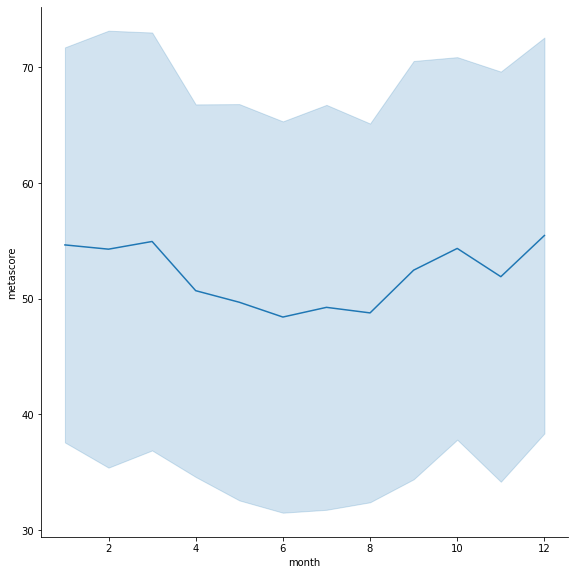

In [39]:
# create a plot comparing month to metascore
sns.relplot(x='month',y='metascore', kind='line', ci='sd', data=imdb_df, height=7.9)

In [63]:
imdb_df.groupby('genre')['genre'].count()

genre
Action                        1
Action, Adventure             7
Action, Adventure, Comedy    59
Action, Adventure, Crime     13
Action, Adventure, Drama     28
                             ..
Romance, Sci-Fi, Thriller     1
Sci-Fi                        1
Sci-Fi, Thriller              3
Thriller                      7
Thriller, Western             1
Name: genre, Length: 289, dtype: int64

In [64]:
# get genre counts
genre_counts = imdb_df.genre.value_counts()
genre_counts

Comedy, Drama, Romance    206
Comedy                    189
Drama                     172
Comedy, Drama             171
Comedy, Romance           148
                         ... 
Family, Sci-Fi              1
Family, Music, Musical      1
Drama, Thriller, Crime      1
Comedy, Action              1
Comedy, Crime, Sport        1
Name: genre, Length: 289, dtype: int64

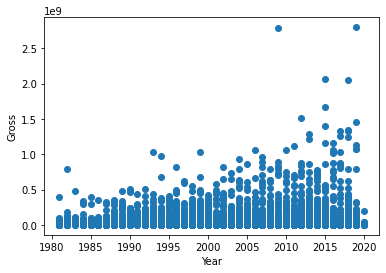

In [40]:
# year vs gross
plt.scatter(imdb_df.year, imdb_df.total_gross)
plt.xlabel('Year')
plt.ylabel('Gross')
plt.show()

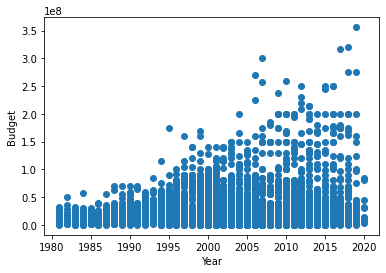

In [41]:
plt.scatter(imdb_df.year, imdb_df.budget)
plt.xlabel('Year')
plt.ylabel('Budget')
plt.show()

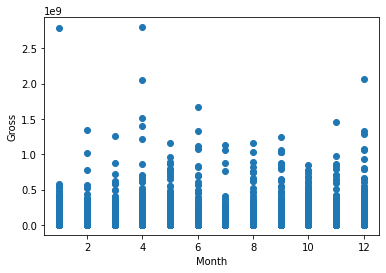

In [42]:
# month vs gross
plt.scatter(imdb_df.month, imdb_df.total_gross)
plt.xlabel('Month')
plt.ylabel('Gross')
plt.show()

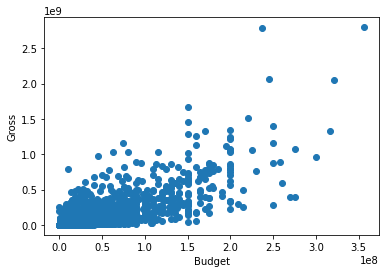

In [43]:
# budget vs gross
plt.scatter(imdb_df.budget, imdb_df.total_gross)
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

In [44]:
# create a new dataframe with budget and gross
budget_vs_gross = pd.DataFrame({'Budget': imdb_df['budget'], 'Gross': imdb_df['total_gross']}).reset_index(drop=True)
budget_vs_gross

,Budget,Gross
0,48000000,76019048
1,12000000,40716963
2,7000000,95461682
3,18000000,12000000
4,11000000,31261269
...,...,...
3326,40000000,309232797
3327,6000000,21171090
3328,29900000,68631669
3329,3000000,10691091


In [45]:
# reshape into an array with shape
X = budget_vs_gross.Budget.values.reshape(-1,1)

In [46]:
X[:5]

array([[48000000],
       [12000000],
       [ 7000000],
       [18000000],
       [11000000]], dtype=int64)

In [47]:
X.shape

(3331, 1)

In [48]:
y = budget_vs_gross.Gross

In [49]:
# create a linear regression model with scikit-learn
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [50]:
# fit the data into the model
model.fit(X, y)

LinearRegression()

In [51]:
y_pred = model.predict(X)
print(y_pred.shape)

(3331,)


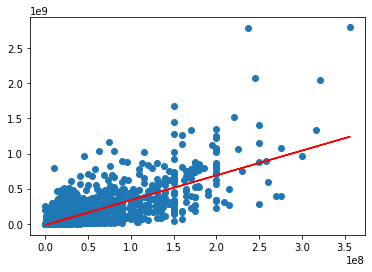

In [52]:
# create a scatter plot, the best fit line is red
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [53]:
# get budget counts
budget_counts = imdb_df.budget.value_counts()
budget_counts

20000000     136
10000000     125
30000000     121
15000000     113
25000000     113
            ... 
260000000      1
35200000       1
725000         1
4520000        1
22700000       1
Name: budget, Length: 324, dtype: int64

In [54]:
budget_vs_gross['Budget_bins'] = pd.cut(budget_vs_gross['Budget'],15)

In [55]:
budget_vs_gross.groupby('Budget_bins')['Budget_bins'].count()

Budget_bins
(-354999.0, 23734266.667]         1938
(23734266.667, 47467533.333]       720
(47467533.333, 71200800.0]         303
(71200800.0, 94934066.667]         147
(94934066.667, 118667333.333]       64
(118667333.333, 142400600.0]        50
(142400600.0, 166133866.667]        45
(166133866.667, 189867133.333]      21
(189867133.333, 213600400.0]        23
(213600400.0, 237333666.667]         6
(237333666.667, 261066933.333]       7
(261066933.333, 284800200.0]         3
(284800200.0, 308533466.667]         1
(308533466.667, 332266733.333]       2
(332266733.333, 356000000.0]         1
Name: Budget_bins, dtype: int64

In [56]:
# increase budget to see if gross is higher
higher_budget = budget_vs_gross.drop(budget_vs_gross[(budget_vs_gross['Budget']>100000000)].index).reset_index(drop=True)

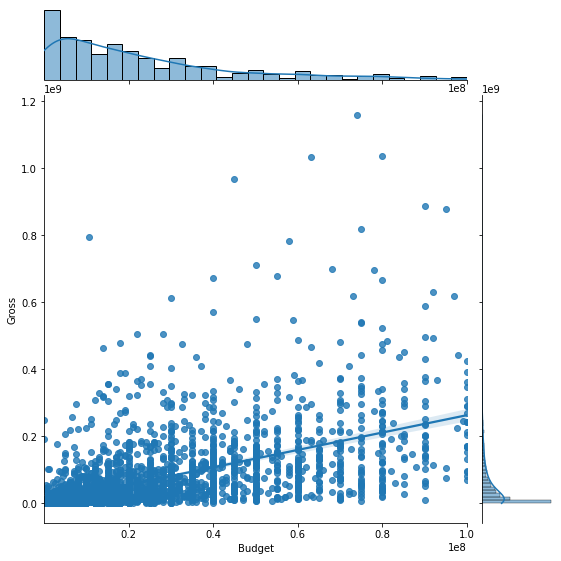

In [57]:
# create a new scatter plot with sns instead of plt
sns.jointplot(x=(higher_budget['Budget']), y=(higher_budget['Gross']), kind='reg', height=7.9)

In [58]:
higher_budget['Budget'].corr(higher_budget['Gross'])

0.5656217702913632

In [59]:
imdb_df['budget'].corr(imdb_df['net_income'])

0.6356128080378259

In [60]:
higher_budget['Budget'].corr(imdb_df['net_income'])

nan

In [61]:
higher_budget['net'] = higher_budget['Gross'] - higher_budget['Budget']
higher_budget['Budget'].corr(higher_budget['net'])

0.3880560981468493

Using all budgets from original dataframe, there is no effect on net income. However, when the budget range was raised to above 100,000,000 there is a noticeable effect on net income

<AxesSubplot:>

<Figure size 1500x700 with 0 Axes>

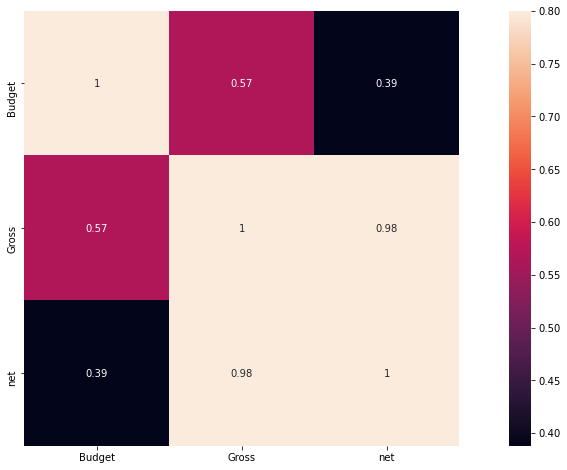

In [62]:
# creating a new heat map with higher budget
plt.figure(figsize=(15,7),dpi=100,)
plt.subplots(figsize=(18,8))
sns.heatmap(data=higher_budget.corr(),square=True,vmax=0.8,annot=True)

Hypothesis: A hit movie is going to be one that has a budget lower than 5 million , while grossing over 2 million and having a profit greater than 500 percent of net. A hit movie can also be one with a budget greater than 5 million while having profit higher than 150 percent of net.

In [ ]:
# create new blockbuster column
imdb_df['net'] = (imdb_df['gross'] - imdb_df['budget'])/imdb_df['budget']
imdb_df['blockbuster'] = 0

In [ ]:
imdb_df

In [ ]:
imdb_df = imdb_df[['title', 'year', 'month', 'genre', 'duration', 'country',
       'language', 'avg_vote', 'votes', 'budget', 'gross', 'net_income', 'net', 'metascore', 'meta_hit', 'blockbuster']]

In [ ]:
# remove outliers
imdb_df = imdb_df.drop(imdb_df[(imdb_df['budget']>100000000)].index).reset_index(drop=True)

In [ ]:
imdb_df['budget'].hist()

In [ ]:
# split data
movies1 = imdb_df[imdb_df['budget']<5000000]
movies2 = imdb_df[imdb_df['budget']>=5000000]

In [ ]:
movies1_under = movies1[movies1['gross']<2000000]
movies1_over = movies1[movies1['gross']>=2000000]

In [ ]:
# set blockbuster condition
movies1_over['blockbuster'] = movies1_over['net'].apply(lambda x : 1 if x>=5 else 0)

In [ ]:
movies1 = pd.concat([movies1_over, movies1_under])

In [ ]:
movies1.groupby('blockbuster')['blockbuster'].count()

In [ ]:
# set blockbuster condition
movies2['blockbuster'] = movies2['net'].apply(lambda x : 1 if x>=1.5 else 0)

In [ ]:
movies2.groupby('blockbuster')['blockbuster'].count()

In [ ]:
imdb_df = pd.concat([movies1, movies2])

In [ ]:
imdb_df.groupby('blockbuster')['blockbuster'].count()

In [ ]:
# create bins for month movie was released
imdb_df['month_bin'] = pd.cut(imdb_df['month'],4)

In [ ]:
imdb_df.groupby('month_bin')['month_bin'].count()

In [ ]:
imdb_df

In [ ]:
imdb_df['duration_bins'] = pd.cut(imdb_df['duration'], 12)

In [ ]:
genre_split = imdb_df['genre'].str.split('|').apply(Series, 1).stack()
genre_split.index = genre_split.index.droplevel(-1)
genre_split.name = 'genre'
del imdb_df['genre']
imdb_df = imdb_df.join(genre_split)

In [ ]:
imdb_df.info()

In [ ]:
log_columns = ['']